## Day 30: Furniture Data Analysis 


1. Import the furniture_data CSV file using pandas. Check 
the length of the DataFrame. Find the sum of duplicates 
in the "Product" column. Using the pandas pivot_table() 
function, return a table that shows how many times each 
product appears in the "Product" column. This table will 
reveal which products are duplicated. 

In [1]:
import pandas as pd 

df = pd.read_csv("furniture_data.csv")
df.head()

,Product,Sale Price,Cost per Product,Quantity,Total Revenue
0,Sofa,800,600,32,25600
1,Chair,300,200,12,3600
2,Table,500,300,41,20500
3,Bed,1000,700,23,23000
4,Wardrobe,800,600,19,15200


In [ ]:
# length of the Data Frame
len(df)

16

In [ ]:
# Finding the number of duplicates
df["Product"].duplicated().sum()


np.int64(6)

In [24]:
df_duplicate = df.pivot_table(index = ["Product"], aggfunc = "size")
print(df_duplicate)

Product
Bed             1
Bookshelf       2
Chair           1
Coffee Table    2
Dresser         2
Ottoman         2
Rug             2
Sofa            1
Table           1
Wardrobe        2
dtype: int64


2. Use Seaborn regplot() to fit a linear regression model and 
visualize the relationship between the price of each item 
and total revenue. What conclusion can you draw from the 
plot? 

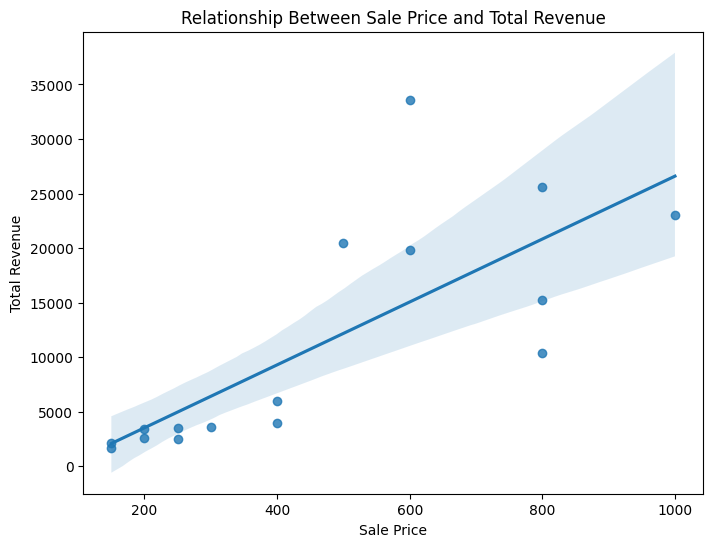

In [28]:
# linear regression model to visualize price and total revenue
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax= plt.subplots(figsize=(8, 6))
sns.regplot(x=df["Sale Price"],
            y=df["Total Revenue"],
            data=df)
plt.title("Relationship Between Sale Price and Total Revenue", fontsize=12)
plt.show()

3. What is the difference in revenue between "wardrobes" 
and "beds"? 

In [45]:
# Grouping data by product and summing the total revenue column
df_group = df.groupby("Product")["Total Revenue"].sum()

# Calculate the difference 
wardrobes_beds_diff = df_group.Wardrobe - df_group.Bed
wardrobes_beds_diff

np.int64(2600)

4. Calculate the "Total_Cost" column and insert it in the 
DataFrame between the "Quantity" and "Total Revenue." 
columns. Use the pandas insert() function. 

In [48]:
# calulate total_cost column and insert inbetween Quantity and Total Revenue 
df.insert(4, "Total Cost", df["Cost per Product"] * df["Quantity"])
df.head()

,Product,Sale Price,Cost per Product,Quantity,Total Cost,Total Revenue
0,Sofa,800,600,32,19200,25600
1,Chair,300,200,12,2400,3600
2,Table,500,300,41,12300,20500
3,Bed,1000,700,23,16100,23000
4,Wardrobe,800,600,19,11400,15200


5. Which product has the least profit margin? 


In [57]:
# Calculate the profit for each product

df["Profit"] = df["Total Revenue"] - df["Total Cost"]

# Grouping data by product and suming revenue and profit
df_group = df.groupby("Product")[["Total Revenue", "Profit"]].sum()

# Calculating profit margin for each product
df_group["Profit_Margin"] = (df_group["Profit"]/df_group["Total Revenue"])*100

# Sorting data by profit margin and returning the first product
df_group.sort_values(by="Profit_Margin", ascending=True).head(1)


,Total Revenue,Profit,Profit_Margin
Product,,,
Dresser,53400,8900,16.666667
